In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os
import plotly.graph_objects as go

In [2]:
q = 1.0
B = 1.0
m = 1.0

In [3]:
def czytaj(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        data = data.T
        return data

In [4]:
data = []
folder = ''
for i in range(5):
    plik = f'lab3_pole_{i}.txt'
    sciezka = os.path.join(folder, plik)
    if os.path.exists(sciezka):
        print(f"Otwieranie {plik}")
        data.append(czytaj(sciezka))
    else:
        print(f"nie istnieje.")

Otwieranie lab3_pole_0.txt
Otwieranie lab3_pole_1.txt
Otwieranie lab3_pole_2.txt
Otwieranie lab3_pole_3.txt
Otwieranie lab3_pole_4.txt


In [5]:
t = []
r = []
phi = []
z = []
p_r = []
p_phi = []
p_z = []
E = []
for i in range(5):
    t.append(data[i][0])
    r.append(data[i][1])
    phi.append(data[i][2])
    z.append(data[i][3])
    p_r.append(data[i][4])
    p_phi.append(data[i][5])
    p_z.append(data[i][6])
    E.append(data[i][7])
# E2 = 1/2*((m.tan(alpha)*z[0]*omega[0])**2 + (vz[0]/m.cos(alpha))**2) + g*z[0]*m.sin(alpha)*(1-np.cos(phi[0]))

In [6]:
x = []
y = []
for i in range(5) :
    x.append(r[i]*np.cos(phi[i]))
    y.append(r[i]*np.sin(phi[i]))

In [7]:
y[0]

array([-1.06065931, -1.06065931, -1.06065931, ..., -1.06065931,
       -1.06065931, -1.06065931])

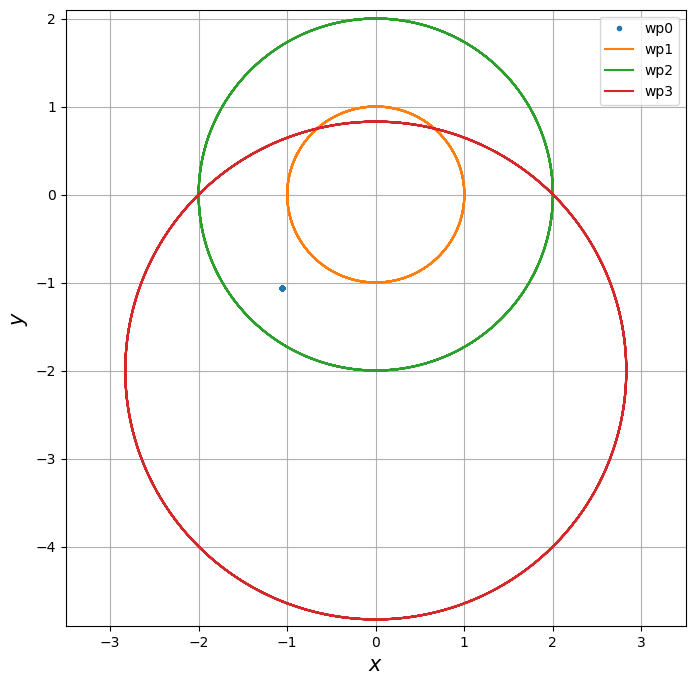

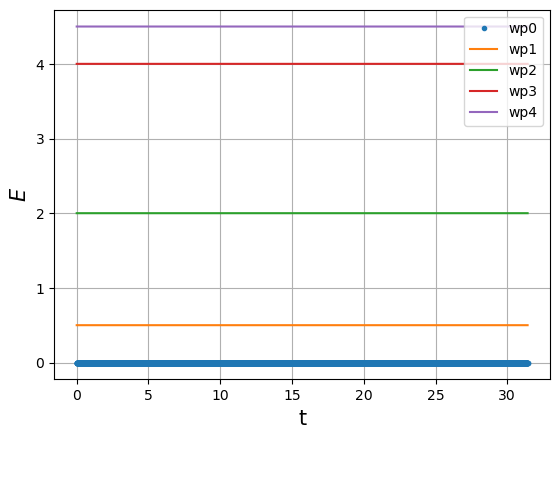

In [8]:
fs=15

plt.figure(figsize=(8,8))

# plt.subplot(2,2,1)
label = fr'wp{0}'
plt.plot(x[0],y[0], '.', label=label)
for i in range(1,4):
    label = fr'wp{i}'
    plt.plot(x[i],y[i], label=label)
plt.xlabel(r'$x$', fontsize=fs)
plt.ylabel(r'$y$', fontsize=fs)
plt.xlim(-3.5, 3.5)
plt.ylim(-4.9, 2.1)
plt.grid()
plt.legend(loc='upper right')
plt.show()

# plt.subplot(2,2,2)
label = fr'wp{0}'
plt.plot(t[0],E[0], '.', label=label)
for i in range(1,5):
    label = fr'wp{i}'
    plt.plot(t[i],E[i], label=label)
plt.xlabel('t\n\n', fontsize=fs)
plt.ylabel(r'$E$', fontsize=fs)
plt.grid()
plt.legend(loc='upper right')
plt.show()

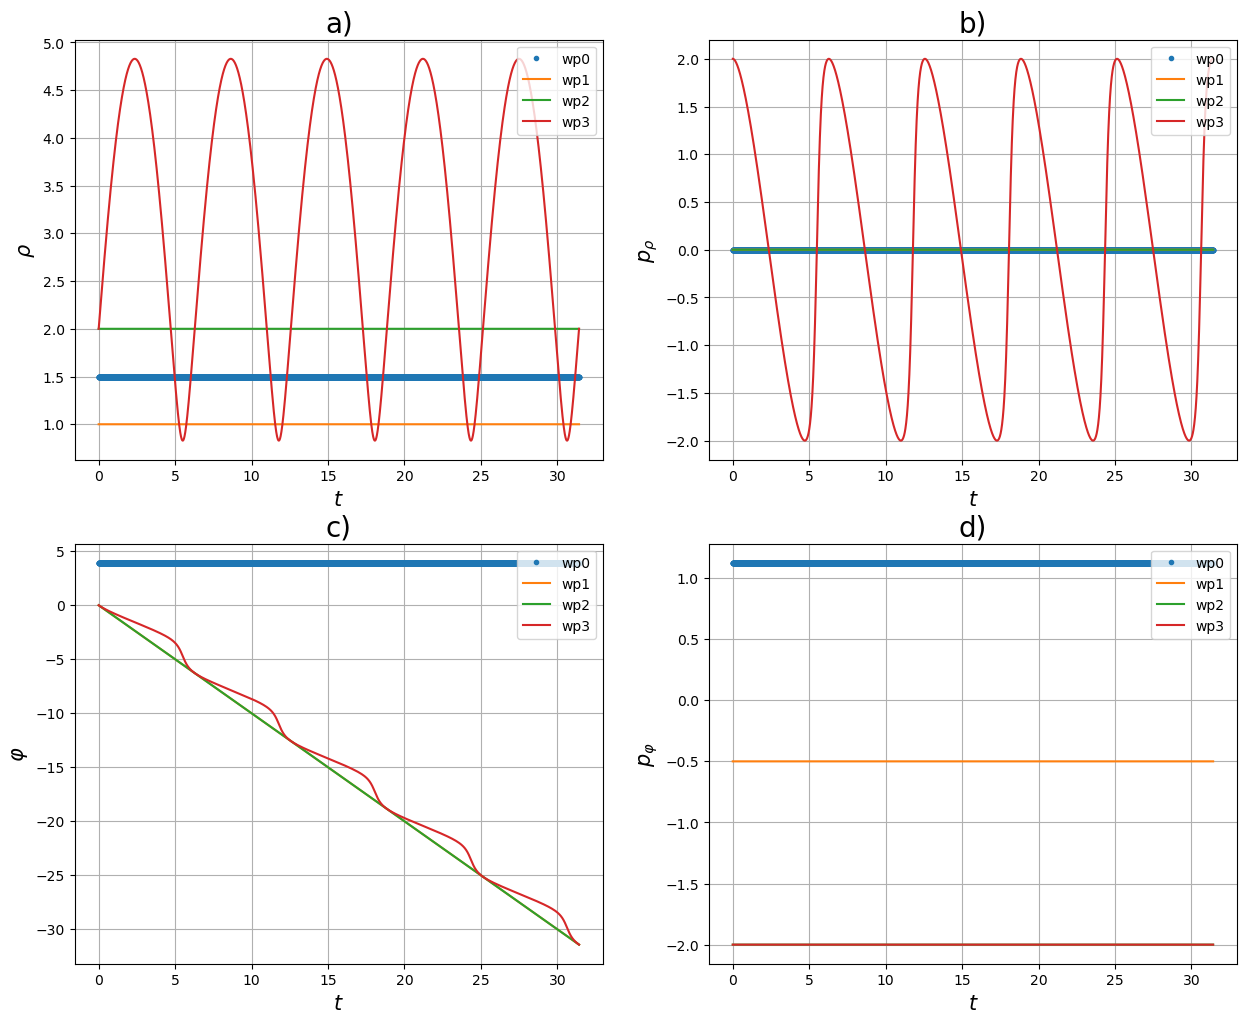

In [9]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
label = fr'wp{0}'
plt.plot(t[0],r[0], '.', label=label)
for i in range(1,4):
    label = fr'wp{i}'
    plt.plot(t[i],r[i], label=label)
plt.title("a)", fontsize=fs+5)
plt.xlabel(r'$t$', fontsize=fs)
plt.ylabel(r'$\rho$', fontsize=fs)
plt.grid()
plt.legend(loc='upper right')
# plt.show()

plt.subplot(2,2,2)
label = fr'wp{0}'
plt.plot(t[0],p_r[0], '.', label=label)
for i in range(1,4):
    label = fr'wp{i}'
    plt.plot(t[i],p_r[i], label=label)
plt.title("b)", fontsize=fs+5)
plt.xlabel(r'$t$', fontsize=fs)
plt.ylabel(r'$p_\rho$', fontsize=fs)
plt.grid()
plt.legend(loc='upper right')
# plt.show()

plt.subplot(2,2,3)
label = fr'wp{0}'
plt.plot(t[0],phi[0], '.', label=label)
for i in range(1,4):
    label = fr'wp{i}'
    plt.plot(t[i],phi[i], label=label)
plt.title("\nc)", fontsize=fs+5)
plt.xlabel(r'$t$', fontsize=fs)
plt.ylabel(r'$\varphi$', fontsize=fs)
plt.grid()
plt.legend(loc='upper right')
# plt.show()

plt.subplot(2,2,4)
label = fr'wp{0}'
plt.plot(t[0],p_phi[0], '.', label=label)
for i in range(1,4):
    label = fr'wp{i}'
    plt.plot(t[i],p_phi[i], label=label)
plt.title("\nd)", fontsize=fs+5)
plt.xlabel(r'$t$', fontsize=fs)
plt.ylabel(r'$p_\varphi$', fontsize=fs)
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [10]:
i = 4
fig = go.Figure(data=go.Scatter3d(x=x[i], y=y[i], z=z[i], mode='lines'))

fig.update_layout(width=1000, height=800)
fig.show()

In [11]:
import matplotlib.animation as animation

/var/folders/py/z0w97nhd37vcvh7l68gb2kk40000gn/T/ipykernel_95445/2994140877.py:15: MatplotlibDeprecationWarning:

Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later



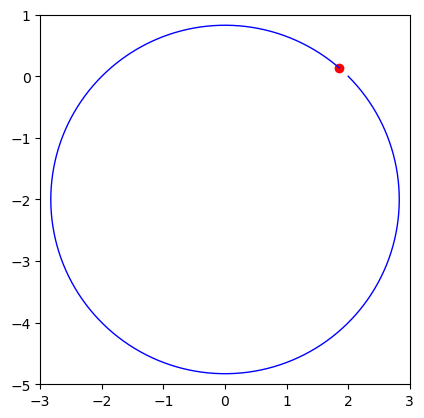

In [17]:
fig, ax = plt.subplots()
point, = ax.plot([], [], 'ro')
traj, = ax.plot([], [], 'b-', lw=1)

ax.set_xlim(-3, 3)
ax.set_ylim(-5, 1)
ax.set_aspect('equal')

def init():
    point.set_data([], [])
    traj.set_data([], [])
    return point, traj

def update(i):
    point.set_data(x[3][10*i-1], y[3][10*i-1])
    traj.set_data(x[3][:10*(i)], y[3][:10*(i)])
    return point, traj

ani = animation.FuncAnimation(fig, update, frames=int(len(x[3])/50),
                              init_func=init, blit=True, interval=30)

# Zapis do pliku GIF
ani.save('animation.gif', writer='pillow', fps=30)
